In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import missingno as msno
%matplotlib inline

In [10]:
df = pd.read_csv('train.csv')
dfv = pd.read_csv('valid.csv')

C:\Users\Limon\AppData\Local\Temp\ipykernel_26368\368070900.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [12]:
df.describe()

,client_id,target,col1,col2,col3,col4,col5,col6,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
count,14456.000000,14456.000000,3.000000,6.000000,12.000000,19.000000,1.0,1.0,3.000000e+00,8.000000e+00,...,6.207000e+03,6.207000e+03,6.207000e+03,5.060000e+02,5.060000e+02,5.060000e+02,8.036000e+03,8.036000e+03,8.036000e+03,14456.000000
mean,2853.066270,0.030160,0.333333,0.500000,0.306548,0.346140,7464071.0,7464071.0,4.762016e+06,4.127563e+06,...,6.951439e+06,6.843002e+06,6.896837e+06,7.042210e+06,7.025990e+06,7.034100e+06,6.934524e+06,6.806725e+06,6.869273e+06,0.258330
std,1957.002315,0.171035,0.577350,0.547723,0.460514,0.452933,NaN,NaN,2.395190e+06,1.430218e+06,...,4.539805e+06,4.509677e+06,4.509058e+06,5.162596e+06,5.160387e+06,5.160985e+06,4.354458e+06,4.315602e+06,4.314412e+06,0.006802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,2.900000e+06,2.900000e+06,...,3.000000e+05,1.000000e+05,3.000000e+05,4.692700e+05,4.692700e+05,4.692700e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,3.410988e+06,3.666482e+06,...,4.316300e+06,4.248000e+06,4.300000e+06,4.413816e+06,4.413816e+06,4.413816e+06,4.334639e+06,4.276000e+06,4.303000e+06,0.256261
50%,2568.000000,0.000000,0.000000,0.500000,0.000000,0.000000,7464071.0,7464071.0,3.921976e+06,3.921976e+06,...,6.240000e+06,6.164000e+06,6.224000e+06,6.322850e+06,6.322850e+06,6.322850e+06,6.244578e+06,6.146774e+06,6.225550e+06,0.256261
75%,4258.250000,0.000000,0.500000,1.000000,0.758929,0.839286,7464071.0,7464071.0,5.693024e+06,3.958614e+06,...,8.801262e+06,8.649254e+06,8.748625e+06,9.110361e+06,9.110361e+06,9.110361e+06,8.769750e+06,8.619750e+06,8.700000e+06,0.257217
max,8302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7464071.0,7464071.0,7.464071e+06,7.464071e+06,...,9.800000e+07,9.800000e+07,9.800000e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


In [13]:
df.columns

Index(['report_date', 'client_id', 'target', 'col1', 'col2', 'col3', 'col4',
       'col5', 'col6', 'col7',
       ...
       'col2654', 'col2655', 'col2656', 'col2657', 'col2658', 'col2659',
       'col2660', 'col2661', 'col2662', 'col2663'],
      dtype='object', length=2666)

In [14]:
df.head(10)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [15]:
df['report_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: report_date
Non-Null Count  Dtype 
--------------  ----- 
14456 non-null  object
dtypes: object(1)
memory usage: 113.1+ KB


In [16]:
threshold = 0.79 * len(df)
df=df.dropna(axis=1, thresh=threshold)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   report_date  14456 non-null  object 
 1   client_id    14456 non-null  int64  
 2   target       14456 non-null  int64  
 3   col1453      14456 non-null  int64  
 4   col1454      14455 non-null  object 
 5   col2167      14433 non-null  float64
 6   col2168      14433 non-null  float64
 7   col2169      14433 non-null  float64
 8   col2170      14433 non-null  float64
 9   col2171      14433 non-null  float64
 10  col2172      14433 non-null  float64
 11  col2173      14433 non-null  float64
 12  col2174      14433 non-null  float64
 13  col2175      14433 non-null  float64
 14  col2176      14433 non-null  float64
 15  col2177      14433 non-null  float64
 16  col2178      14433 non-null  float64
 17  col2179      14433 non-null  float64
 18  col2180      14433 non-null  float64
 19  col2

In [18]:
df = df.drop_duplicates()
   

In [19]:
df['col1453'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: col1453
Non-Null Count  Dtype
--------------  -----
14456 non-null  int64
dtypes: int64(1)
memory usage: 113.1 KB


In [20]:
df.describe()

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
count,14456.000000,14456.000000,14456.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,...,14419.000000,14419.000000,14419.000000,14419.000000,14419.000000,14217.000000,14217.000000,14217.000000,13748.000000,14456.000000
mean,2853.066270,0.030160,0.052020,0.054597,0.207788,0.424860,0.632162,1.246588,2.250191,0.146193,...,1.406408,1.438338,41.995904,38.487048,40.250542,1.313308,1.197255,1.250674,332.556663,0.258330
std,1957.002315,0.171035,0.222075,0.349907,0.769060,1.138325,1.377584,1.855607,2.265828,0.642387,...,0.645656,0.649861,15.688033,16.060254,14.772459,1.078575,1.034741,1.025690,321.477466,0.006802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.800000,18.820000,1.300000,13.414286,0.000000,0.000000,0.000000,0.000000,0.230229
25%,1186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,31.090000,26.510000,29.740000,0.000000,0.000000,0.000000,116.000000,0.256261
50%,2568.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,1.000000,1.000000,36.870000,35.560000,36.240000,1.370000,1.270000,1.300000,247.000000,0.256261
75%,4258.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,...,2.000000,2.000000,52.940000,49.800000,50.230000,2.020000,1.950000,1.950000,432.000000,0.257217
max,8302.000000,1.000000,1.000000,6.000000,13.000000,14.000000,16.000000,29.000000,55.000000,13.000000,...,4.000000,4.000000,108.300000,103.400000,103.950000,13.080000,7.400000,7.400000,2132.000000,0.339800


In [21]:
df.head(10)

,report_date,client_id,target,col1453,col1454,col2167,col2168,col2169,col2170,col2171,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.00,545.0,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.00,242.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.10,557.0,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.40,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,54.52,54.52,54.520,2.28,2.28,2.28,256.0,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,3.0,3.0,3.0,...,1.0,1.0,26.60,26.60,26.600,0.00,0.00,0.00,31.0,0.318994
6,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,35.57,2.51,19.040,0.00,0.00,0.00,336.0,0.258853
7,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,66.48,3.58,35.030,0.00,0.00,0.00,1972.0,0.256261
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,3.0,6.0,...,4.0,4.0,103.00,4.50,73.450,0.00,0.00,0.00,68.0,0.266285
9,2022-02-01,19,0,0,0b498e8a-7c01-466d-b112-0c5785574f45,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,60.18,60.18,60.180,0.00,0.00,0.00,364.0,0.256261


In [22]:
def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: 
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,report_date,client_id,target,col1453,col1454,col2167,col2168,col2169,col2170,col2171,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,21,1,0,0,14,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.00,545.0,0.256261
1,21,5,0,1,32,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.00,242.0,0.256261
2,15,6,0,0,39,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.10,557.0,0.256261
3,19,7,0,0,59,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.40,NaN,0.258682
4,18,8,0,0,113,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,54.52,54.52,54.520,2.28,2.28,2.28,256.0,0.254164


<Axes: >

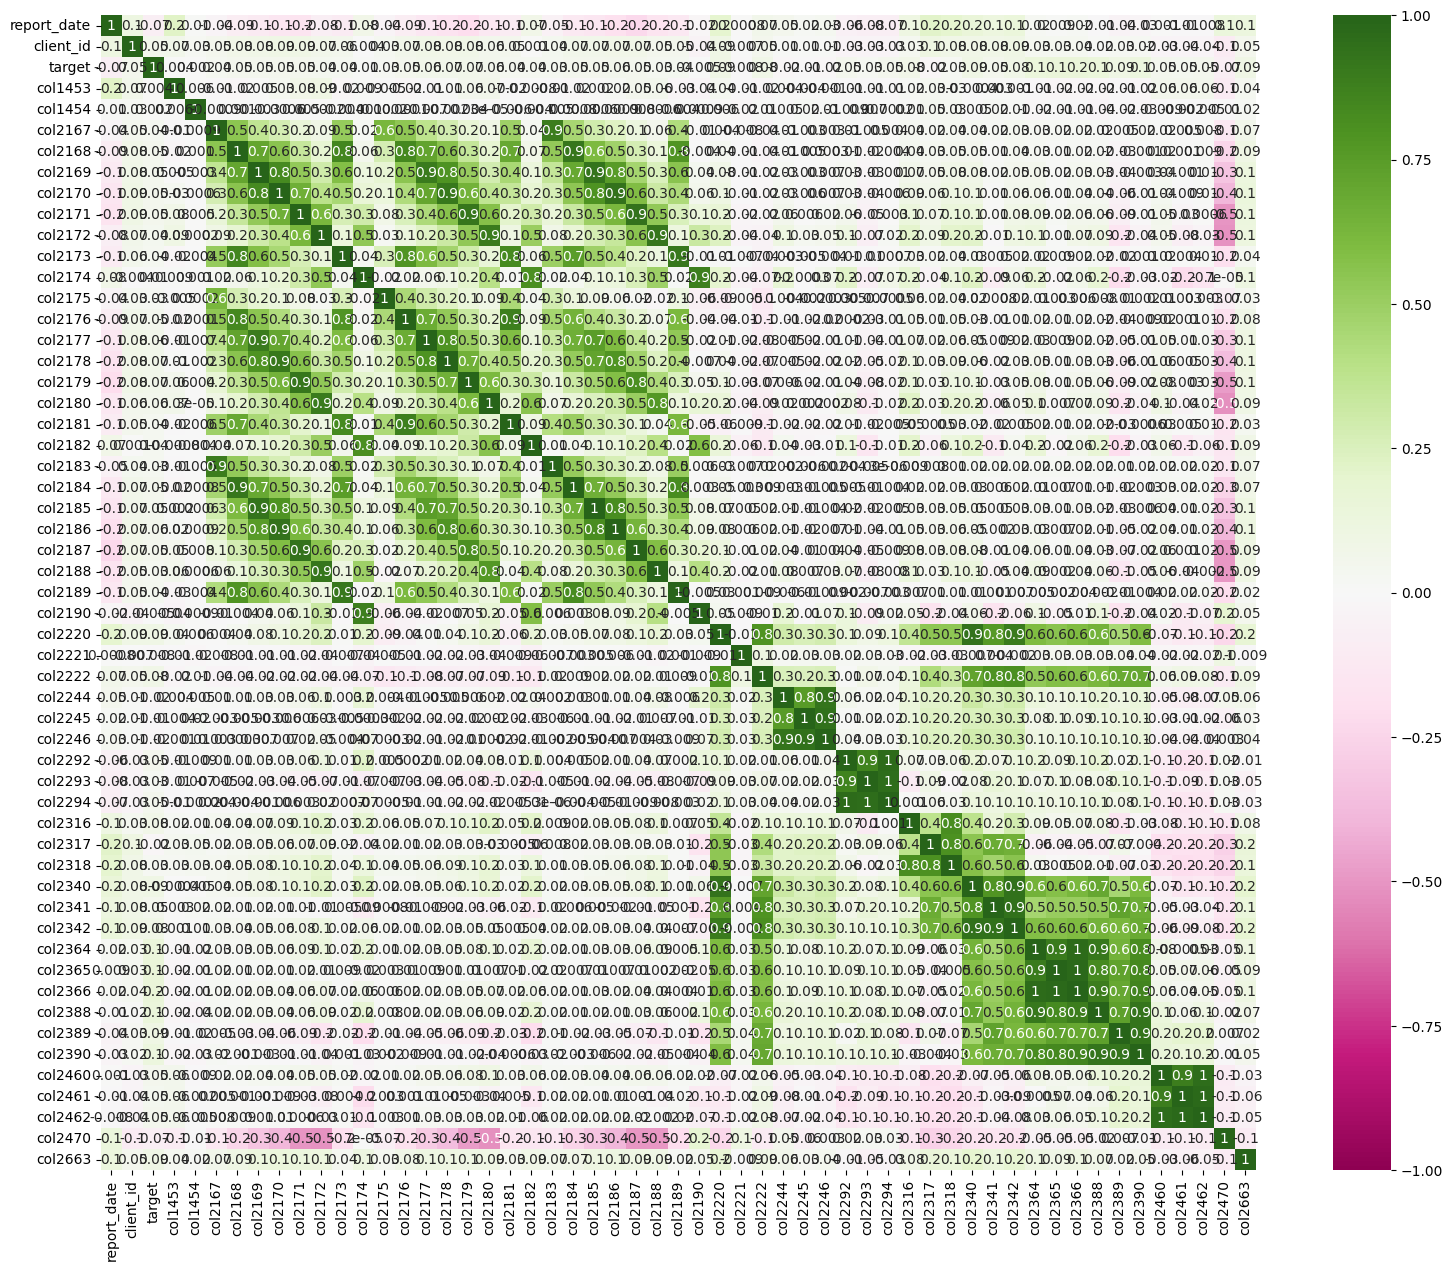

In [23]:
encoded_data, encoders = number_encode_features(df)
plt.subplots(figsize=(20,15))
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='PiYG', fmt='.1g', vmin=-1, vmax=1, center= 0)

In [24]:
# df = df.drop_duplicates(subset='client_id')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   report_date  14456 non-null  object 
 1   client_id    14456 non-null  int64  
 2   target       14456 non-null  int64  
 3   col1453      14456 non-null  int64  
 4   col1454      14455 non-null  object 
 5   col2167      14433 non-null  float64
 6   col2168      14433 non-null  float64
 7   col2169      14433 non-null  float64
 8   col2170      14433 non-null  float64
 9   col2171      14433 non-null  float64
 10  col2172      14433 non-null  float64
 11  col2173      14433 non-null  float64
 12  col2174      14433 non-null  float64
 13  col2175      14433 non-null  float64
 14  col2176      14433 non-null  float64
 15  col2177      14433 non-null  float64
 16  col2178      14433 non-null  float64
 17  col2179      14433 non-null  float64
 18  col2180      14433 non-null  float64
 19  col2

<Axes: >

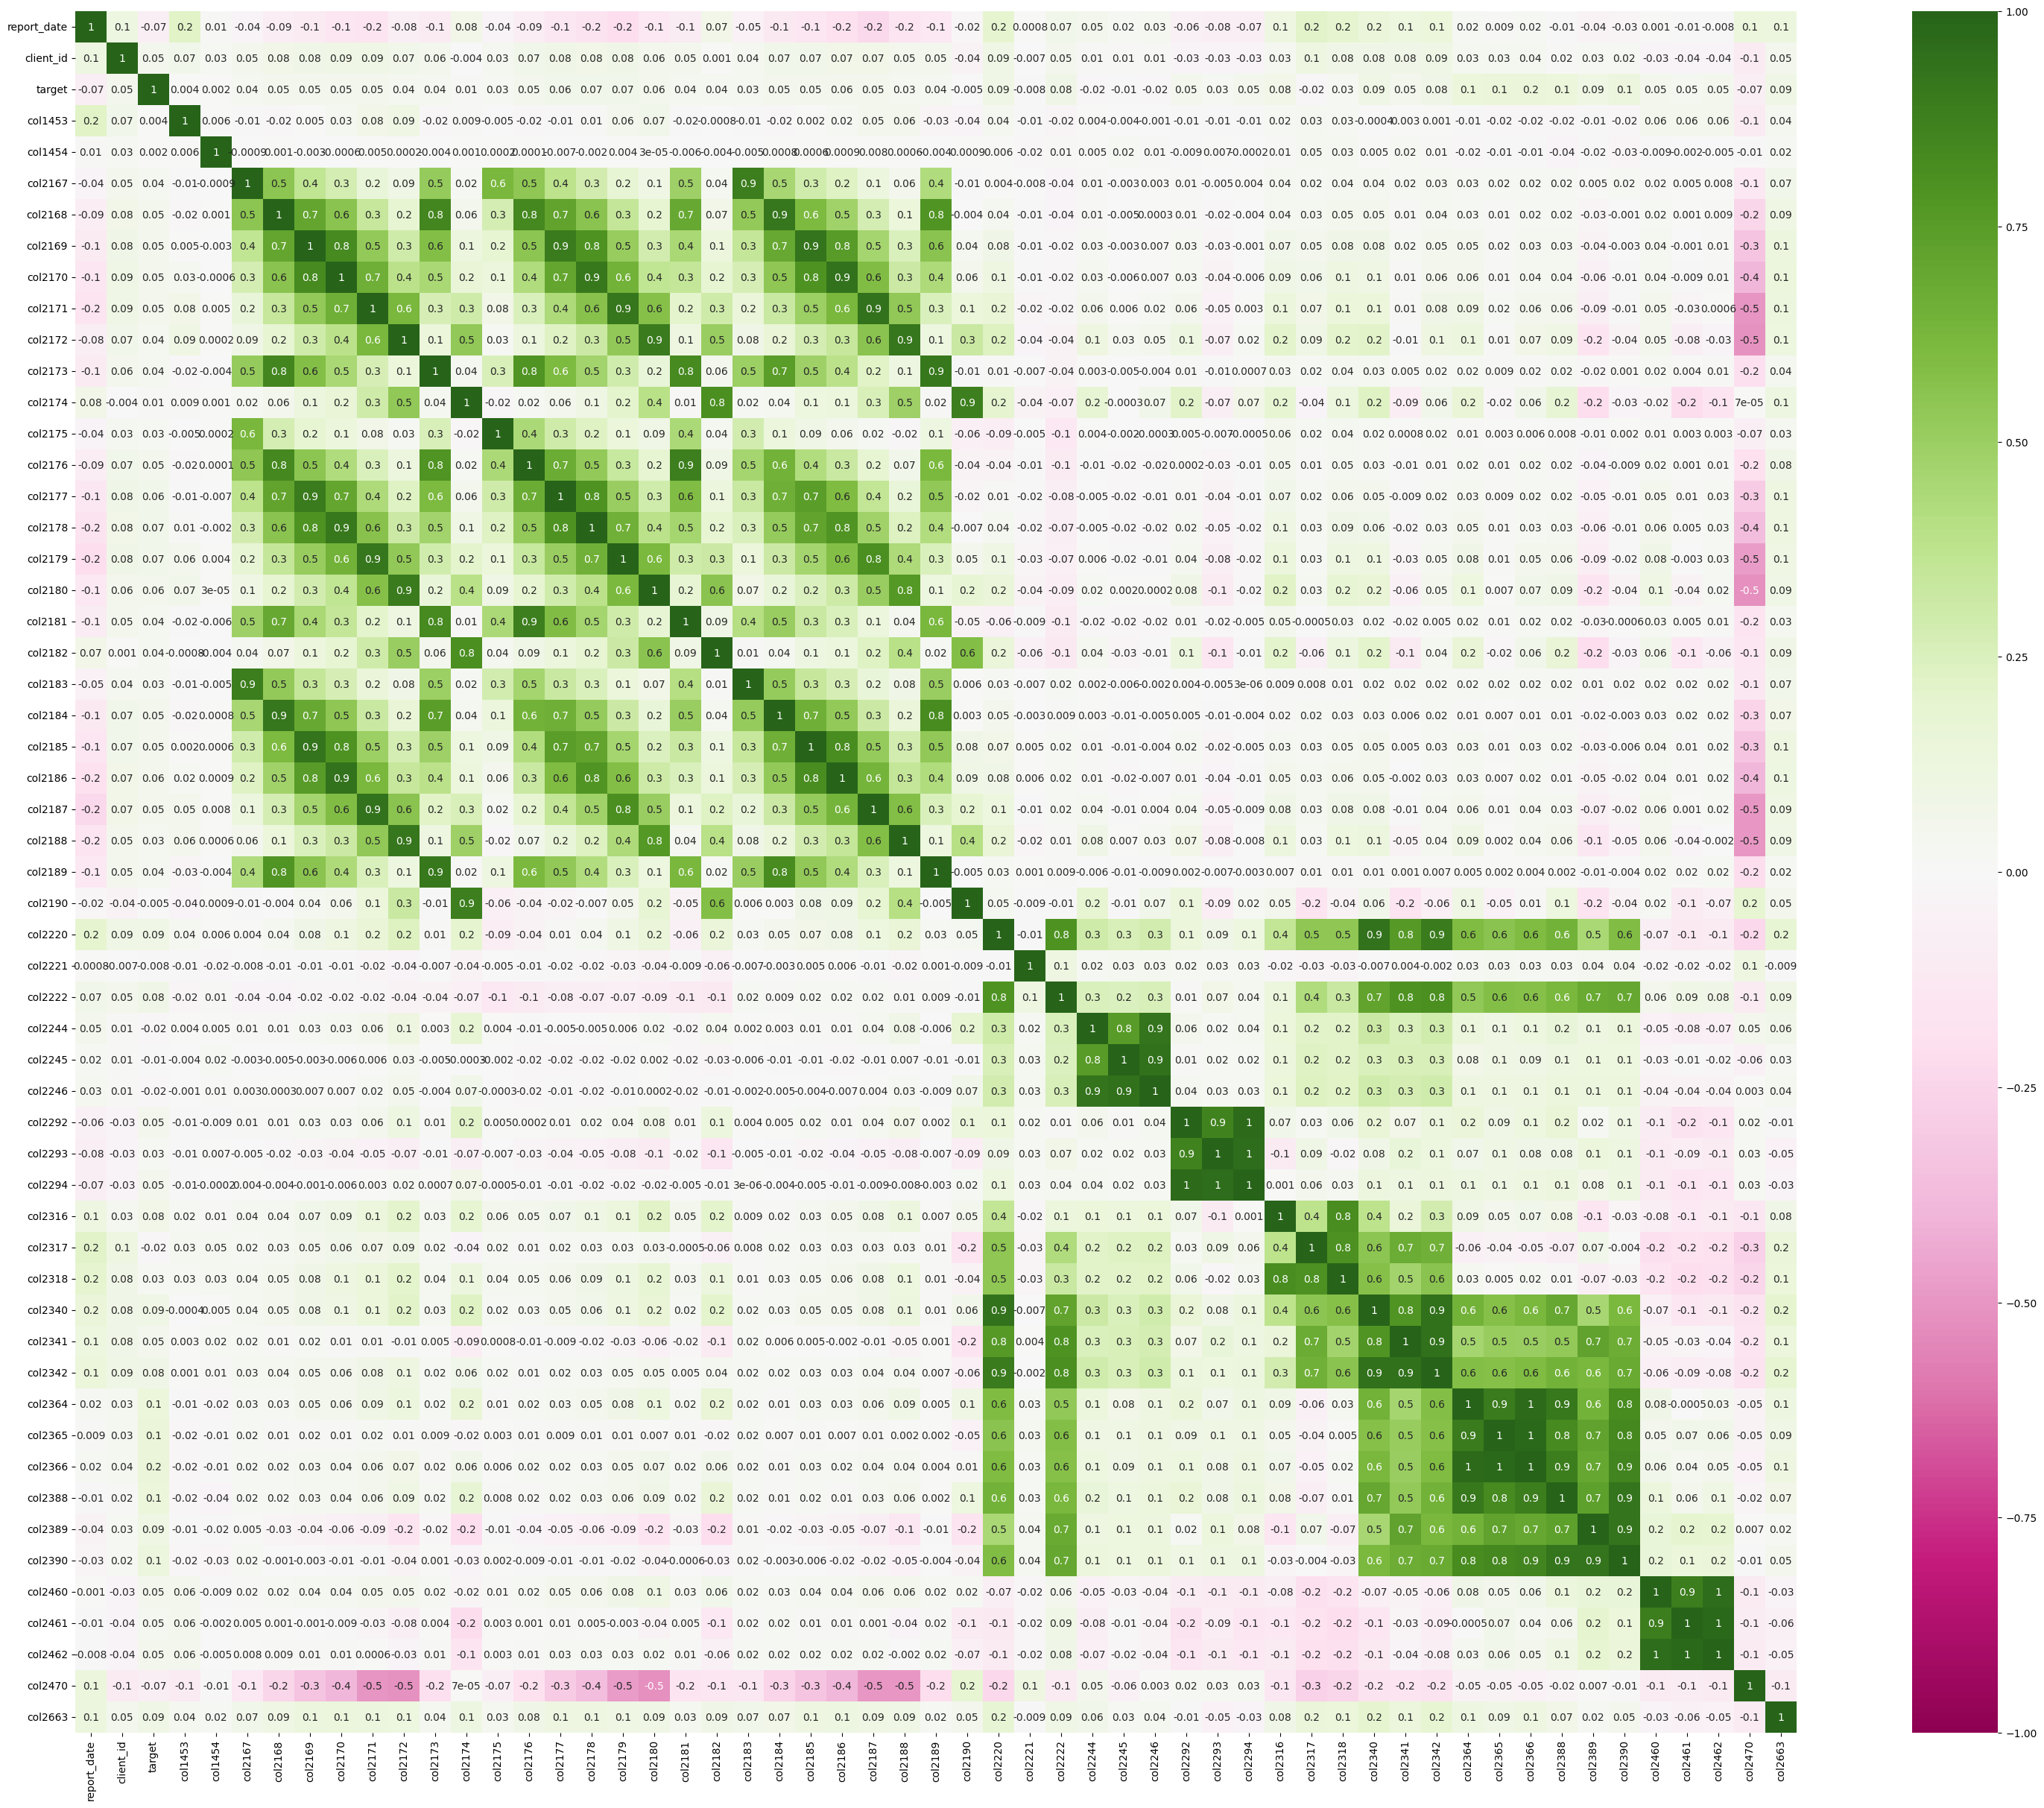

In [26]:
encoded_data, encoders = number_encode_features(df)
plt.subplots(figsize=(40,30))
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='PiYG', fmt='.1g', vmin=-1, vmax=1, center= 0)

<Axes: >

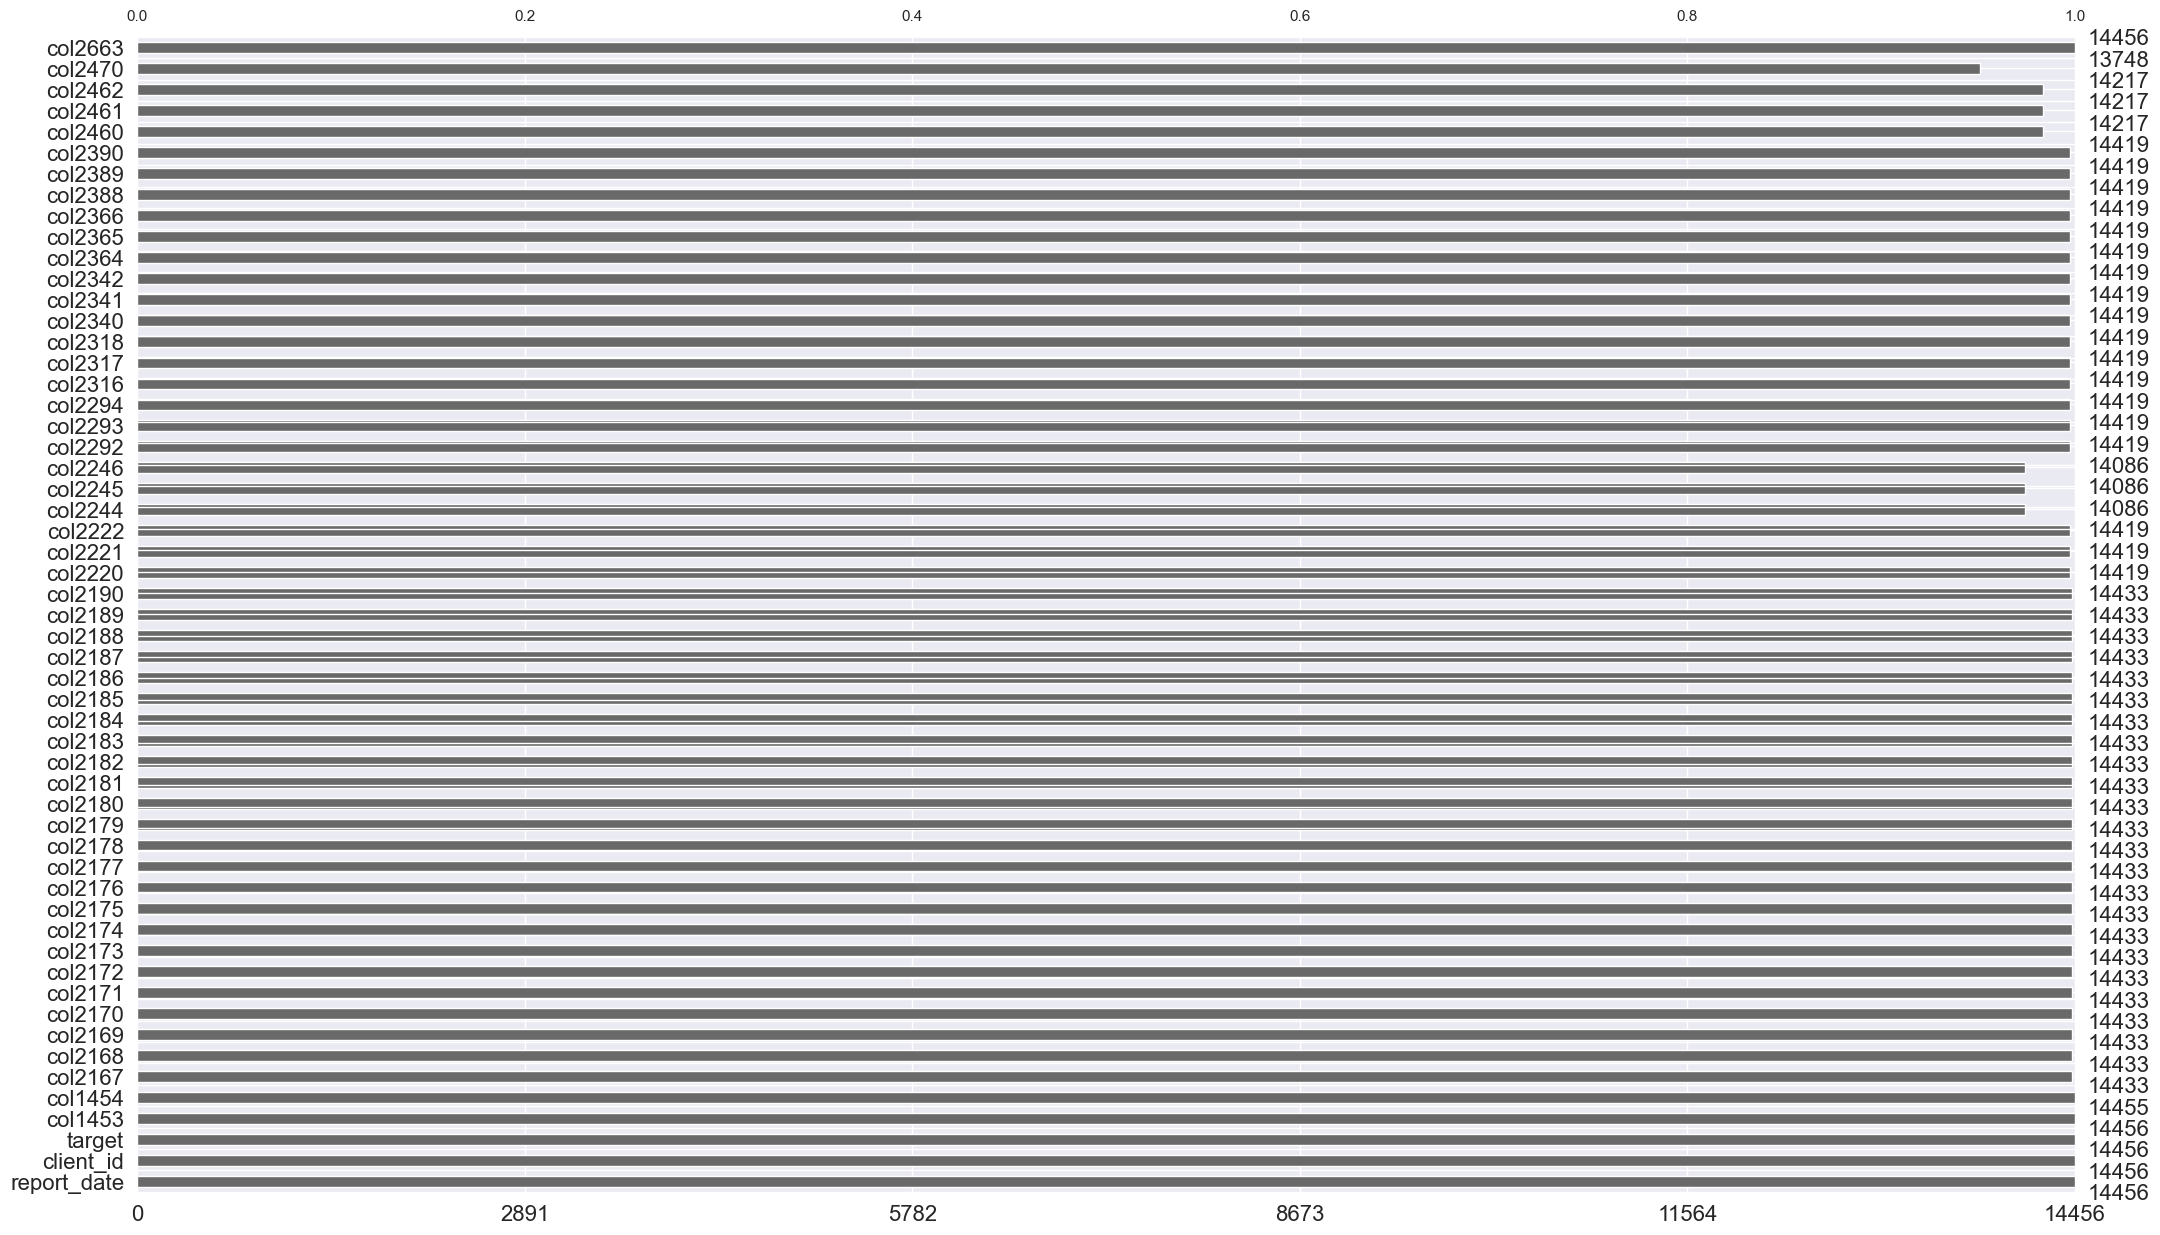

In [27]:
sns.set()
msno.bar(df)

In [28]:
df.to_csv('pomogite.csv', index=False) 

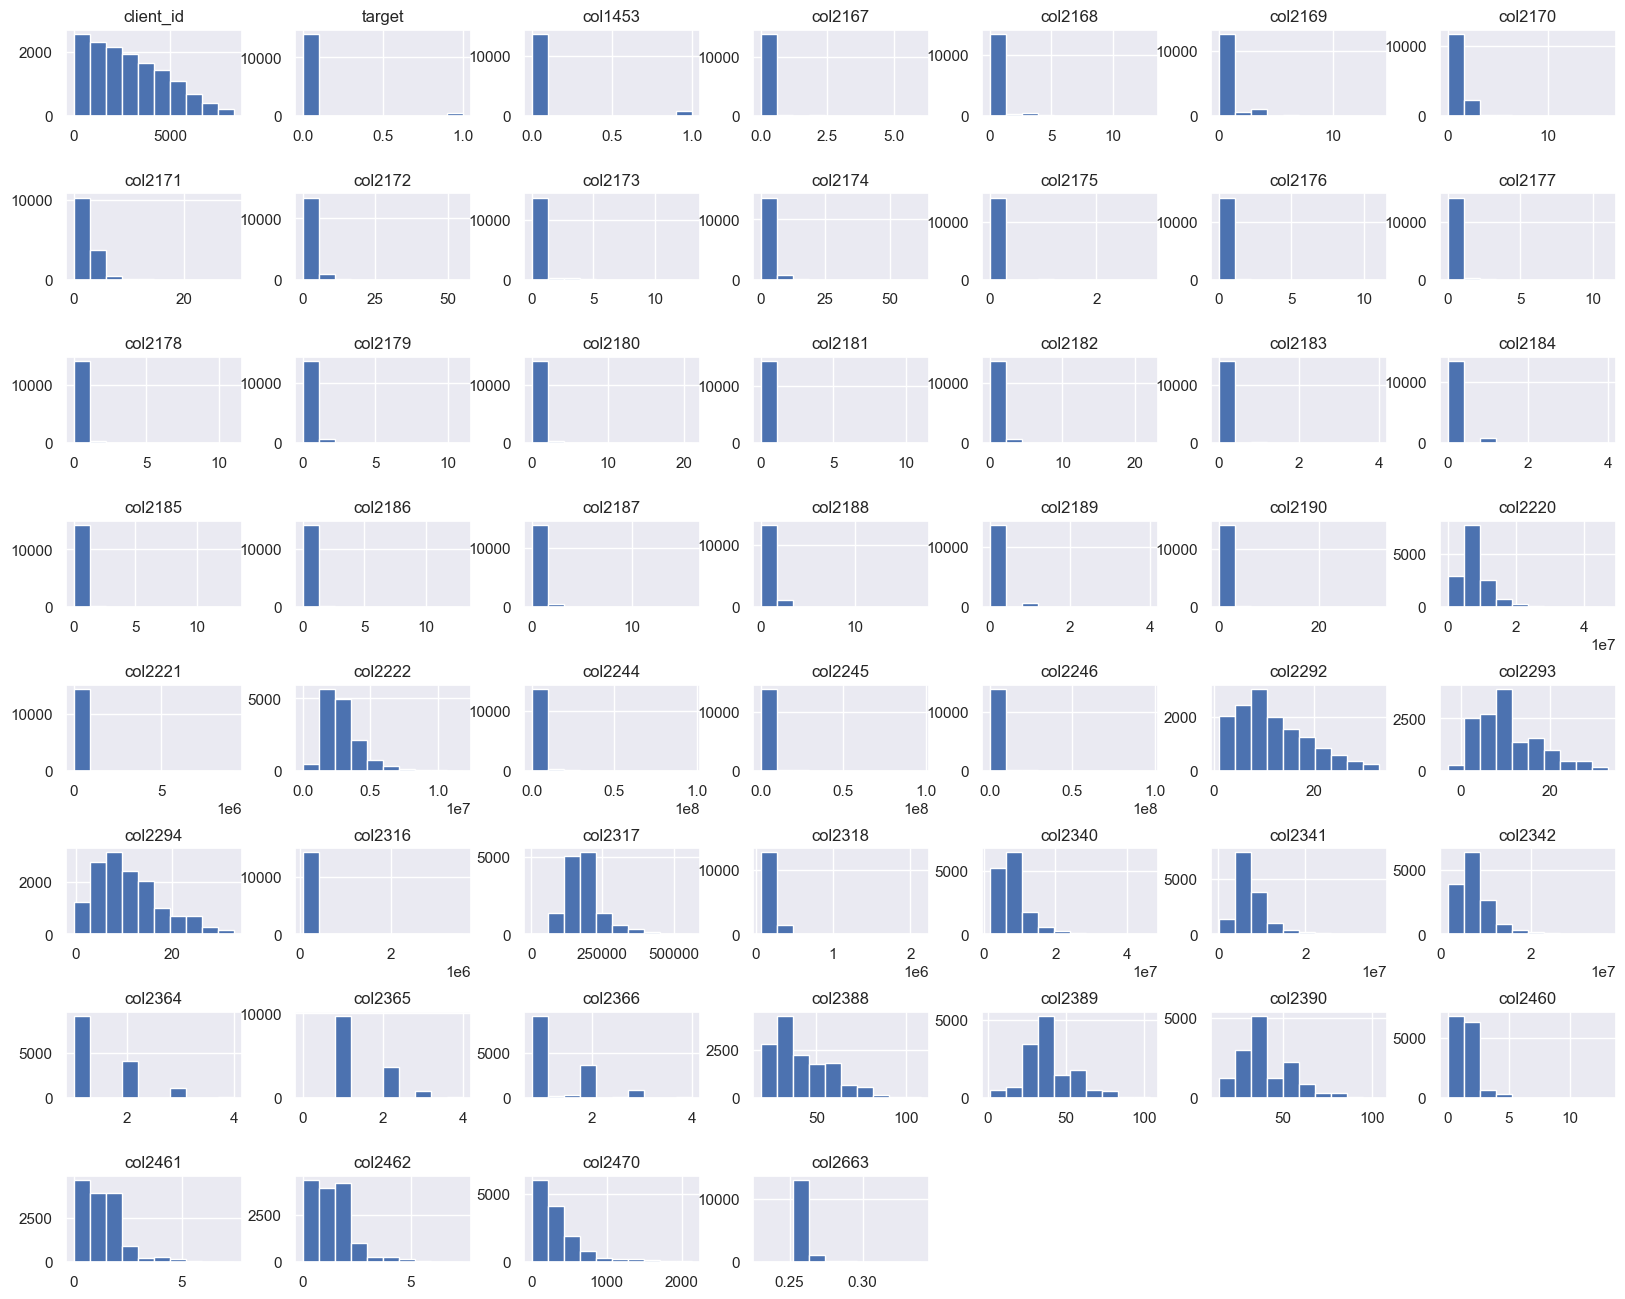

In [29]:
df.hist(bins=10, figsize=(20, 16))
plt.subplots_adjust(hspace=0.9)
plt.show()

In [30]:
df['col2366'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: col2366
Non-Null Count  Dtype  
--------------  -----  
14419 non-null  float64
dtypes: float64(1)
memory usage: 113.1 KB


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   report_date  14456 non-null  object 
 1   client_id    14456 non-null  int64  
 2   target       14456 non-null  int64  
 3   col1453      14456 non-null  int64  
 4   col1454      14455 non-null  object 
 5   col2167      14433 non-null  float64
 6   col2168      14433 non-null  float64
 7   col2169      14433 non-null  float64
 8   col2170      14433 non-null  float64
 9   col2171      14433 non-null  float64
 10  col2172      14433 non-null  float64
 11  col2173      14433 non-null  float64
 12  col2174      14433 non-null  float64
 13  col2175      14433 non-null  float64
 14  col2176      14433 non-null  float64
 15  col2177      14433 non-null  float64
 16  col2178      14433 non-null  float64
 17  col2179      14433 non-null  float64
 18  col2180      14433 non-null  float64
 19  col2

In [32]:
dfv = dfv.loc[:, df.columns]

In [33]:
dfv = dfv.dropna()
df = df.dropna()

бейслан модель

C:\Users\Limon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


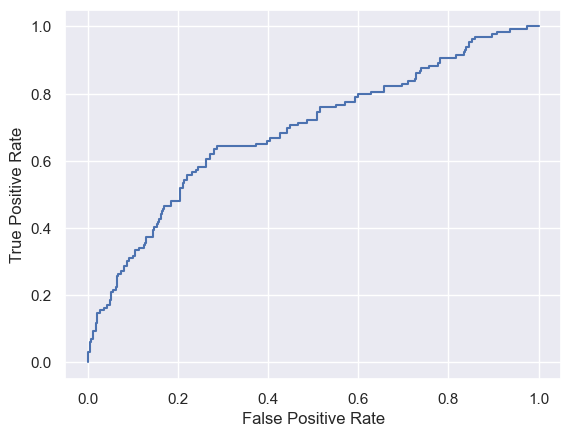

AUC: 0.690


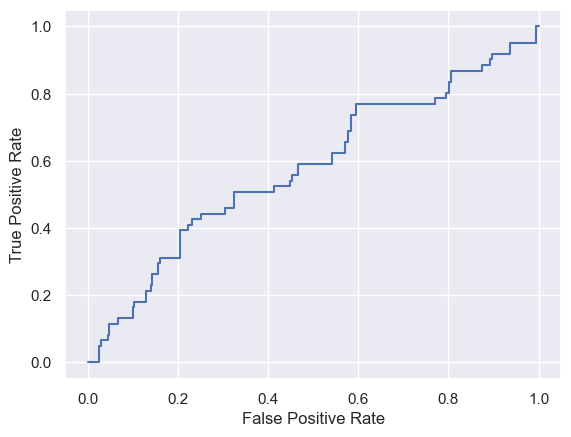

AUC: 0.580


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

data = df
X = data.drop(columns=['target', 'report_date','col1454'], axis=1)
y = data['target']

X_val = dfv.drop(columns=['target', 'report_date','col1454'], axis=1)
y_val = dfv['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# инициализация и обучение модели
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

# предсказание вероятностей
y_pred_proba = log_regression.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)

y_pred_proba_val = log_regression.predict_proba(X_val)[:,1]

fpr_val, tpr_val, _ = metrics.roc_curve(y_val,  y_pred_proba_val)

# построение ROC кривой
plt.plot(fpr_val, tpr_val)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc_val = metrics.roc_auc_score(y_val, y_pred_proba_val)
print("AUC: %.3f" % auc_val)
